# World cup analysis

I am a big fan of soccer and FIFA World Cup (FWC) history, and the highest-scoring wins of England, France, and Spain caught my attention, and I wondered how the total number and the average goals scored behave during the World Cups. Are there considerable differences among all the past tournaments, and if so, what are the leading causes for that? As a data scientist and analyst, I decided to collect the data needed via Wikipedia and FIFA websites to answer these questions and bring many others to the surface along the way. The data set and the notebook with all the analysis, code, machine learning models, and insights are available on my GitHub (https://github.com/hanada-stephan/fifa_world_cup_analysis) and feel free to clone it and do your work. 

--- 

# EDA

Let's import and explore the data set.

In [1]:
# Importing libraries

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [2]:
sns.set_theme(style="darkgrid")
sns.set(font_scale=1.5)

In [3]:
# Setting plot parameters

mpl.rcParams["figure.figsize"] = (15, 8)
mpl.rcParams["font.size"] = 12

In [4]:
# Loading the data set

goals_historic = pd.read_csv("./data/historic_world_cup_goals.csv")

In [5]:
# Displaying de first 5 rows

goals_historic.head()

,year,world_cup_day,number_of_goals,number_of_matches,cumulative_number_of_goals,cumulative_number_of_matches,average_scored_goals
0,1930,1,8,2,8,2,4.00
1,1930,2,7,2,15,4,3.75
2,1930,3,1,1,16,5,3.20
3,1930,4,3,1,19,6,3.17
4,1930,5,8,3,27,9,3.00


In [6]:
# Checking the data frame's shape

goals_historic.shape

(535, 7)

In [7]:
# Checking the missing values

goals_historic.isnull().sum()

year                            0
world_cup_day                   0
number_of_goals                 0
number_of_matches               0
cumulative_number_of_goals      0
cumulative_number_of_matches    0
average_scored_goals            0
dtype: int64

In [8]:
# Displaying data types

goals_historic.dtypes

year                              int64
world_cup_day                     int64
number_of_goals                   int64
number_of_matches                 int64
cumulative_number_of_goals        int64
cumulative_number_of_matches      int64
average_scored_goals            float64
dtype: object

In [9]:
# Displaying the main statistics

goals_historic.describe()

,year,world_cup_day,number_of_goals,number_of_matches,cumulative_number_of_goals,cumulative_number_of_matches,average_scored_goals
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,1982.478505,13.917757,4.740187,1.678505,80.880374,30.011215,2.810897
std,24.756095,8.378497,5.445145,1.564292,45.887183,18.483008,0.812199
min,1930.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1966.000000,7.000000,0.000000,0.000000,43.500000,15.000000,2.410000
50%,1986.000000,13.000000,4.000000,2.000000,77.000000,28.000000,2.640000
75%,2002.000000,20.000000,8.000000,3.000000,118.000000,48.000000,2.970000
max,2018.000000,33.000000,43.000000,8.000000,171.000000,64.000000,5.500000


In [10]:
# Checking all the World Cup years

goals_historic["year"].unique()

array([1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978,
       1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018],
      dtype=int64)

There are no missing values, and all the columns have the correct data types. The describe() method tells us:
- the most extended World Cup lasted 33 days;
- the highest number of scored goals and matches in a single day is 44 and 8, respectively;
- the highest number of goals scored in a single World Cup edition is 171 (1998 and 2014).

--- 

# Average scored goals by World Cup edition

Let us see the evolution of the average of scored goals by the World Cup edition. 

In [11]:
# Grouping the number of goals and matches by year

mean_goals = pd.DataFrame(goals_historic.groupby(["year"])["number_of_goals", "number_of_matches"].sum())
mean_goals["average_scored_goals"] = round(mean_goals["number_of_goals"]/mean_goals["number_of_matches"], 2)
mean_goals = mean_goals.reset_index()
mean_goals

C:\Users\steph\AppData\Local\Temp\ipykernel_11104\1633740304.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_goals = pd.DataFrame(goals_historic.groupby(["year"])["number_of_goals", "number_of_matches"].sum())


,year,number_of_goals,number_of_matches,average_scored_goals
0,1930,70,18,3.89
1,1934,70,17,4.12
2,1938,72,16,4.50
3,1950,88,22,4.00
4,1954,140,26,5.38
5,1958,126,35,3.60
6,1962,89,32,2.78
7,1966,89,32,2.78
8,1970,95,32,2.97
9,1974,97,38,2.55


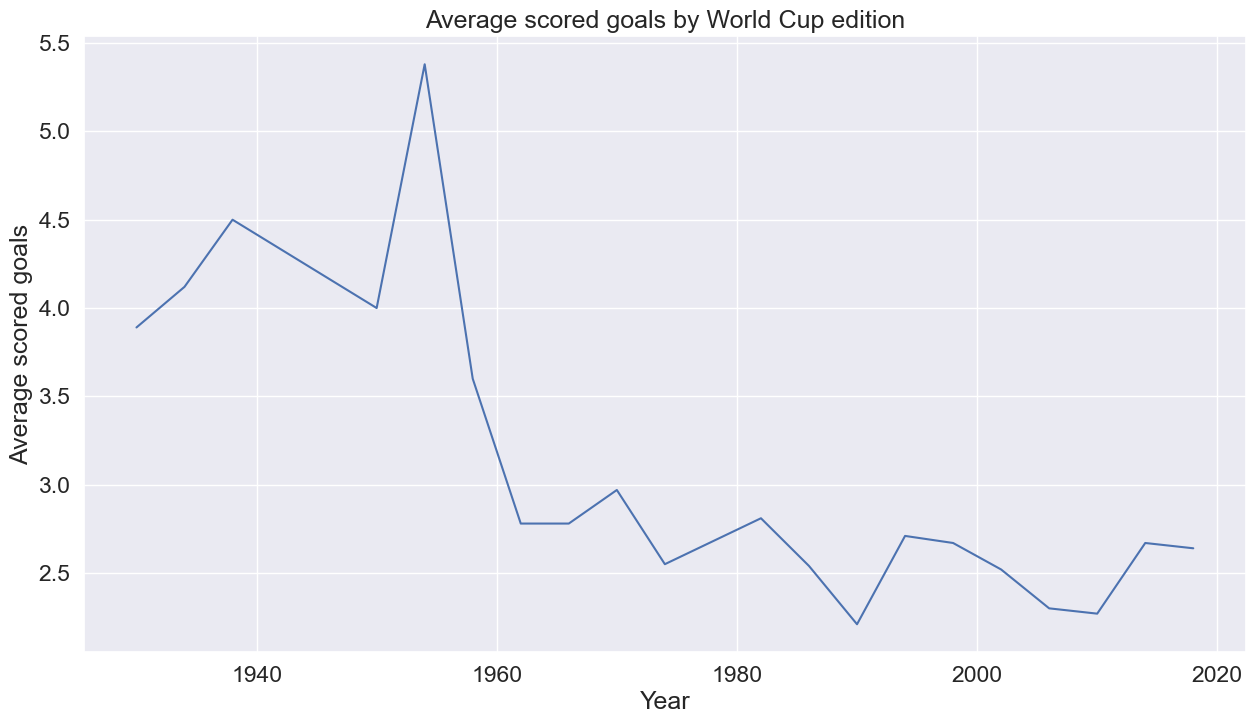

In [12]:
# Plotting the average number of goals by world cup

sns.lineplot(x="year", y="average_scored_goals", data=mean_goals)
plt.title("Average scored goals by World Cup edition")
plt.xlabel("Year")
plt.ylabel("Average scored goals")
plt.show()

There is a considerable average scored goals difference after the 1958 Sweden FIFA World Cup, which dropped from an average of 3.5 to below 3 for the entire competition until now. This difference could be explained by:
- the evolution of soccer itself;
- continuous exchange between offensive and defensive tactics;
- better tournament strategies;
- decreasing the teams' technical levels over time.

The last factor could be the most relevant one because the FIFA World Cup was getting more prominent over time, and more national teams decided to participate and developed plans to increase their technical level. Thus, the difference between the best and the worst teams was getting smaller, and the matches with many goals scored became less frequent. 

--- 

# Average number of goals during World Cups analysis

In [13]:
# Dividing the data set into smaller ones

early_world_cups = goals_historic[goals_historic["year"]<1966]
mid_world_cups = goals_historic[(goals_historic["year"]>=1966) & (goals_historic["year"]<1994)]
last_world_cups = goals_historic[goals_historic["year"]>=1994]

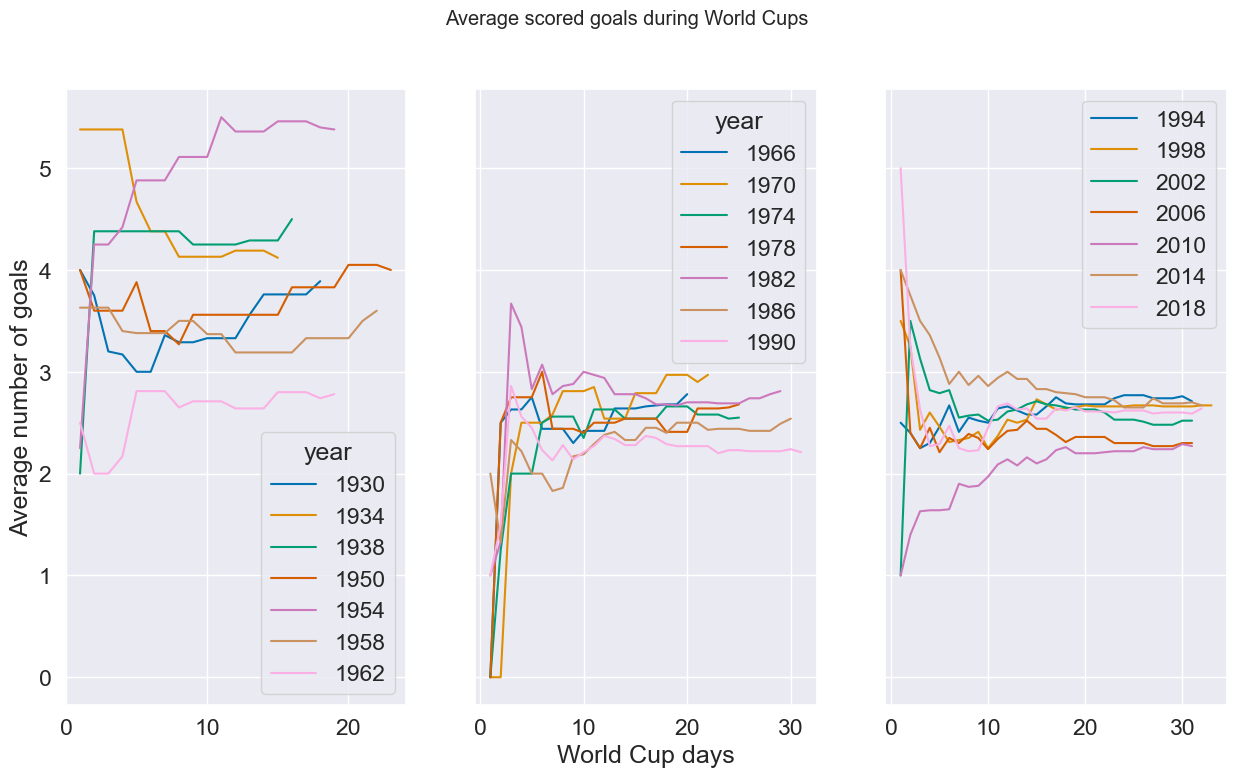

In [14]:
# Plotting the goals average during the world cup days

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True)

sns.lineplot(x="world_cup_day", y="average_scored_goals", data=early_world_cups, hue="year", palette = "colorblind", ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel("Average number of goals")

sns.lineplot(x="world_cup_day", y="average_scored_goals", data=mid_world_cups, hue="year", palette = "colorblind", ax=ax2)
ax2.set_xlabel("World Cup days")

sns.lineplot(x="world_cup_day", y="average_scored_goals", data=last_world_cups, hue="year", palette = "colorblind", ax=ax3)
ax3.set_xlabel("")

fig.suptitle("Average scored goals during World Cups")
plt.legend()
plt.show()

We can see the difference between the first five editions and the others in the average number of goals. 

---

# 2022 Qatar World Cup average scored goals

In [15]:
# Loading the data set

qatar_goals = pd.read_csv("./data/qatar_world_cup_goals.csv")

In [16]:
# Displaying de first 5 rows

qatar_goals.head()

,year,world_cup_day,number_of_goals,number_of_matches,cumulative_number_of_goals,cumulative_number_of_matches,average_scored_goals
0,2022,1,2,1,2,1,2.00
1,2022,2,12,3,14,4,3.50
2,2022,3,8,4,22,8,2.75
3,2022,4,11,4,33,12,2.75
4,2022,5,8,4,41,16,2.56


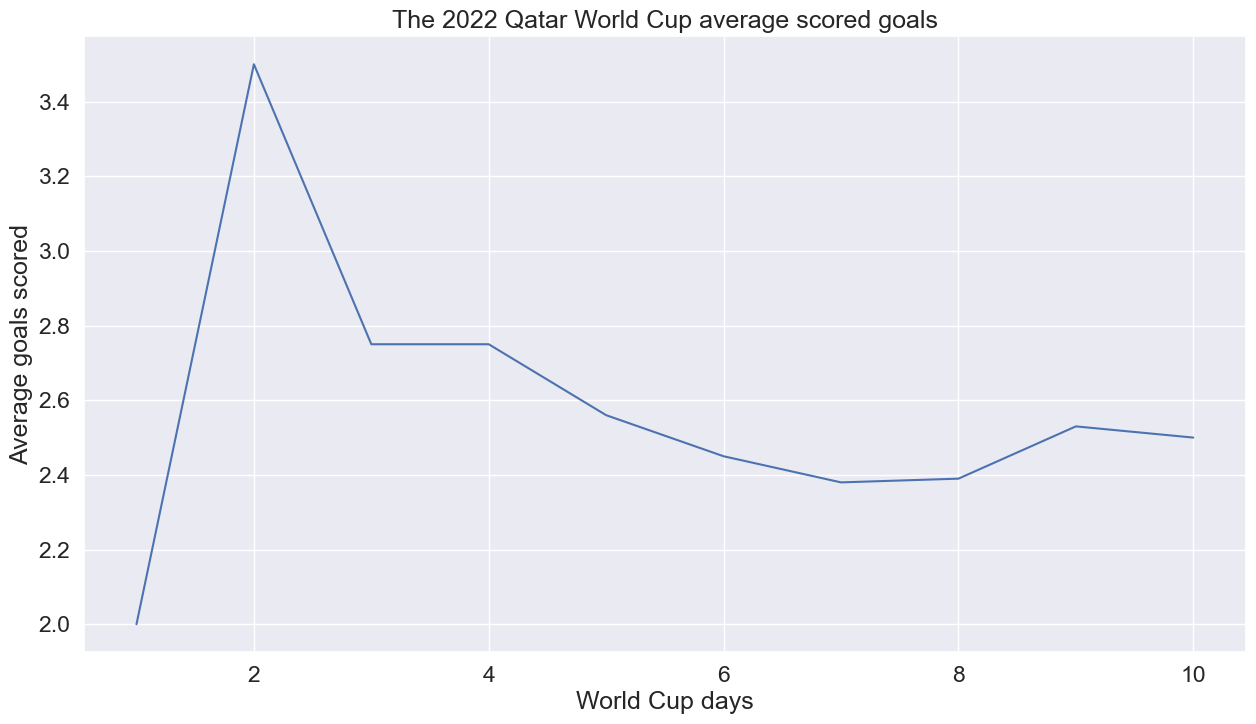

In [17]:
# Plotting the average number of goals of 2022 World Cup

sns.lineplot(x="world_cup_day", y="average_scored_goals", data=qatar_goals, palette = "colorblind")
plt.title("The 2022 Qatar World Cup average scored goals")
plt.xlabel("World Cup days")
plt.ylabel("Average goals scored")
plt.show()

In [18]:
# Selecting the last six World Cups

last_six_wc = last_world_cups[last_world_cups["year"]>1994]

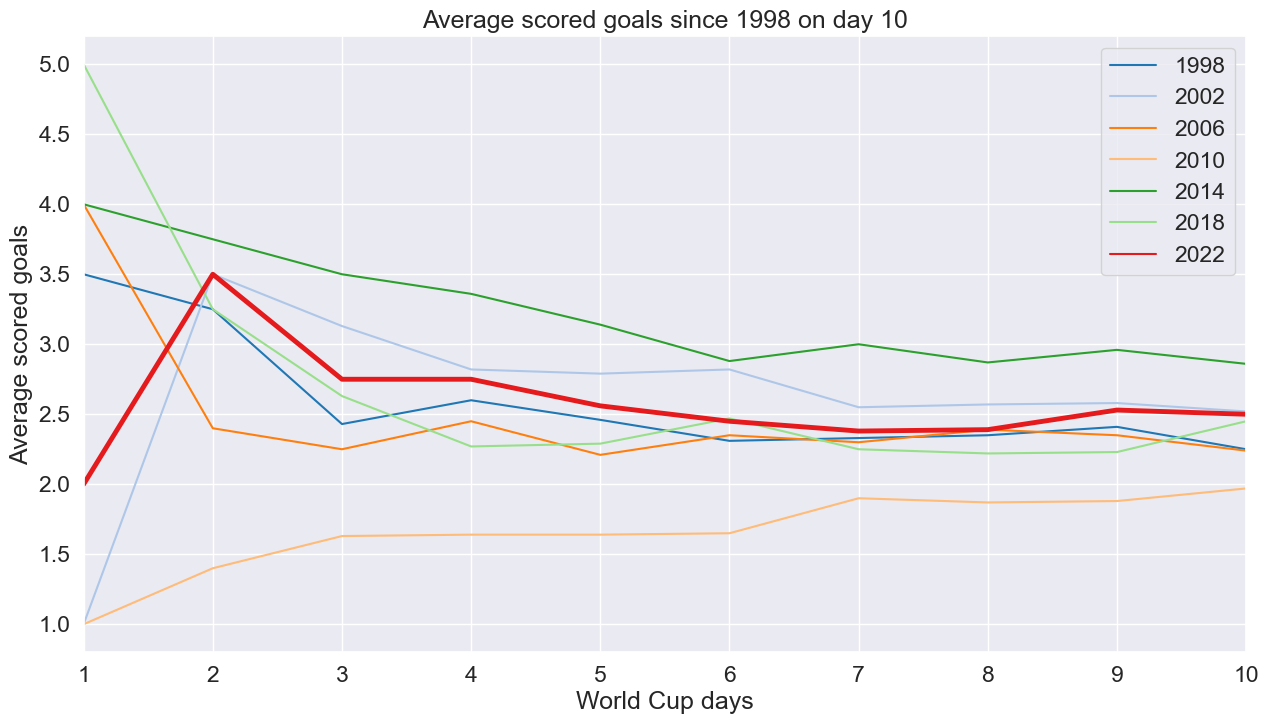

In [21]:
# Comparing the average scored goals of last six WC

ax = sns.lineplot(x="world_cup_day", y="average_scored_goals", data=last_six_wc, hue="year", palette = "tab20")
sns.lineplot(x="world_cup_day", y="average_scored_goals", data=qatar_goals, hue="year", palette = "Set1", linewidth=3.5)
plt.xlabel("World Cup days")
plt.ylabel("Average scored goals")
plt.title("Average scored goals since 1998 on day 10") # Change it every day
plt.legend()
plt.xlim(1,10)
plt.savefig("./img/avg_goals_since_france_day10.jpg")

- Day 6: the 2022 WC scored an average number of goals similar to the previous tournament in Russia.
- Day 7: the average number of scored goals dropped a little, and now it is closer to 1998 and 2006.
- Day 8: the average scored goals stayed the same, although November 27th had the third-best number of goals in this tournament, only behind day 2 with 12 and day 4 with 11 goals scored, respectively.
- Day 9: 14 goals were scored, best number so far and the average increase to around 2.55;
- Day 10: the average still near to 2.50 and tends to stabilize until the end of the tournament. 

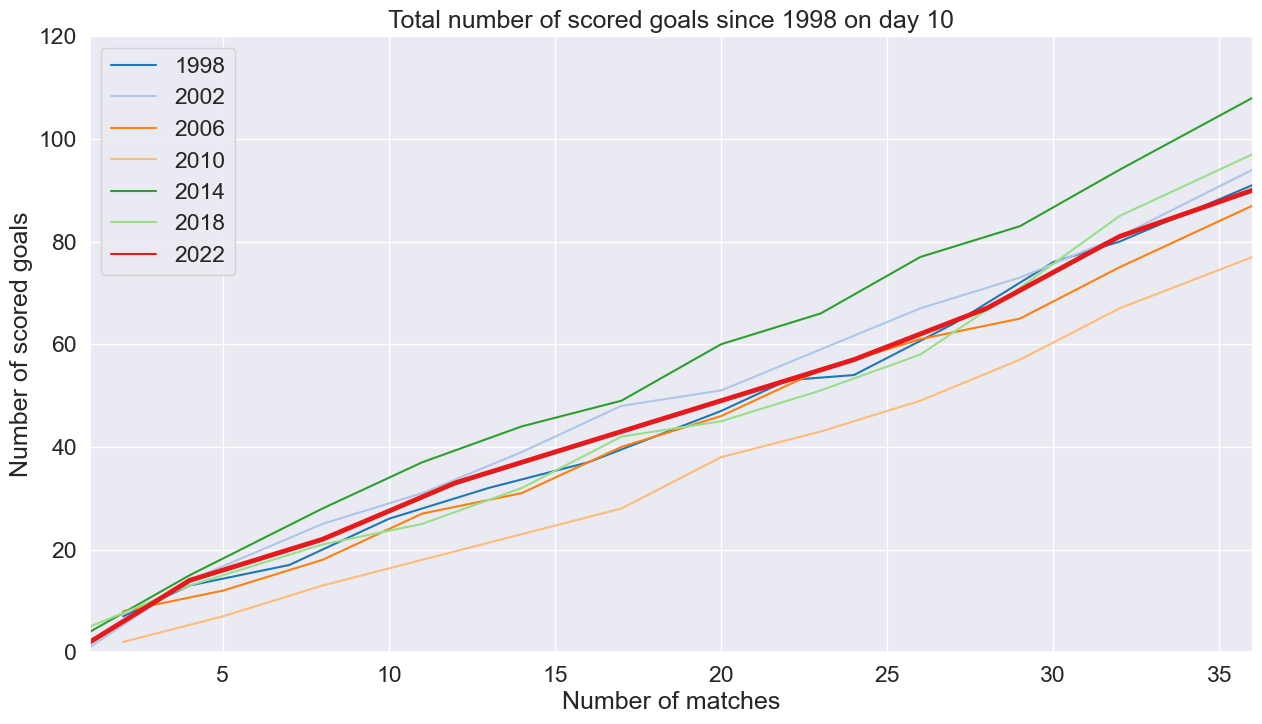

In [22]:
# Comparing the total number of scored goals of last six WC

ax = sns.lineplot(x="cumulative_number_of_matches", y="cumulative_number_of_goals", data=last_six_wc, hue="year", palette = "tab20")
sns.lineplot(x="cumulative_number_of_matches", y="cumulative_number_of_goals", data=qatar_goals, hue="year", palette = "Set1", linewidth=3.5)
plt.xlabel("Number of matches")
plt.ylabel("Number of scored goals")
plt.title("Total number of scored goals since 1998 on day 10")
plt.legend()
plt.xlim(1,36)
plt.ylim(0,120)
plt.savefig("./img/total_goals_since_france_day10.jpg")

- After 16 matches, Qatar 2022 is 7-8 goals behind the highest number of Brazil 2014;
- After 20 matches, the number of scored goals seems to be increasing linearly, and now it is closer to the number registered in France in 1998 for the second place, but still 10 goals behind Brazil in 2014.
- After 24 matches, Qatar 2022 FWC has the same goals scored as in 2006. Also, it is the fourth time in this World Cup edition (days 3, 5, 6, and 7) with the same number of goals scored, 8. 
- After 28 matches, Qatar 2022 FWC has dropped to 5th place considering the total goals scored, only above the 2006 and 2010 tournaments. 
- After 36 matches, Qatar World Cup is only above 2006 and 2010 tournaments, which could lead to a poor average scored goals.